<a href="https://colab.research.google.com/github/tlacaelel666/SaaS/blob/main/desfaz_minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de Función de Onda 1D con Desfase Lineal para Computación Cuántica Híbrida

Este notebook documenta una técnica fundamental en computación cuántica híbrida, enfocándose en la aplicación de desfases lineales (operadores de paridad en ciertos contextos) a funciones de onda unidimensionales.

La simulación utiliza una función de onda gaussiana como base y demuestra cómo la introducción de un factor de fase lineal modifica su representación en el espacio real, impactando tanto la parte real como la imaginaria, mientras que la magnitud permanece inalterada.

Este enfoque es relevante para comprender cómo ciertos operadores cuánticos, que inducen cambios de fase, pueden ser simulados o analizados utilizando técnicas clásicas como base, lo cual es crucial en algoritmos cuánticos híbridos donde se combinan recursos clásicos y cuánticos.

**Contenido:**

1.  **Implementación básica de la función de onda:** Simulación utilizando diccionarios para representar números complejos.
2.  **Implementación con NumPy:** Una versión más eficiente utilizando arrays de NumPy.
3.  **Visualización de la función de onda:** Gráficos interactivos para observar el efecto del desfase lineal en la parte real, imaginaria y magnitud de la función de onda.

Este notebook sirve como una herramienta educativa y de exploración para visualizar y comprender el impacto de los operadores de fase en sistemas cuánticos simulados clásicamente, sentando las bases para exploraciones más profundas en algoritmos cuánticos híbridos y la representación de estados cuánticos.

In [6]:
! pip install numpy matplotlib pandas seaborn

### implementación básica de la función de onda |ψ⟩.


In [7]:
import math

def wave_function(x_values, linear_phase=0.0):
    """
    Simula una función de onda 1D con un factor de fase lineal usando solo diccionarios.

    Args:
        x_values (list): Lista de coordenadas espaciales.
        linear_phase (float): Factor de fase lineal.

    Returns:
        dict: Diccionario con las coordenadas x como claves y los valores complejos como valores.
    """
    result = {}

    for x in x_values:
        # Función base: e^(-x²)
        psi_base = math.exp(-x**2)

        # Factor de fase: e^(i * linear_phase * x) = cos(linear_phase * x) + i * sin(linear_phase * x)
        phase_real = math.cos(linear_phase * x)
        phase_imag = math.sin(linear_phase * x)

        # Multiplicación de números complejos: psi_base * (phase_real + i * phase_imag)
        real_part = psi_base * phase_real
        imag_part = psi_base * phase_imag

        # Almacenar como tupla (parte_real, parte_imaginaria)
        result[x] = (real_part, imag_part)

    return result

# Función auxiliar para trabajar con números complejos como tuplas
def complex_magnitude(complex_tuple):
    """Calcula la magnitud de un número complejo representado como tupla."""
    real, imag = complex_tuple
    return math.sqrt(real**2 + imag**2)

def complex_phase(complex_tuple):
    """Calcula la fase de un número complejo representado como tupla."""
    real, imag = complex_tuple
    return math.atan2(imag, real)

# Ejemplo de uso
if __name__ == "__main__":
    # Coordenadas espaciales
    x_coords = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

    # Calcular función de onda con fase lineal
    wave_result = wave_function(x_coords, linear_phase=1.0)

    print("Función de onda calculada:")
    print("x\t\tReal\t\tImag\t\tMagnitud")
    print("-" * 50)

    for x, (real, imag) in wave_result.items():
        magnitude = complex_magnitude((real, imag))
        print(f"{x:4.1f}\t\t{real:8.4f}\t{imag:8.4f}\t{magnitude:8.4f}")

    # Ejemplo adicional: comparar con diferentes fases lineales
    print("\nComparación con diferentes fases lineales:")
    phases = [0.0, 0.5, 1.0, 2.0]

    for phase in phases:
        result = wave_function([0, 1], linear_phase=phase)
        print(f"Fase {phase}: x=0 → {result[0]}, x=1 → {result[1]}")

Función de onda calculada:
x		Real		Imag		Magnitud
--------------------------------------------------
-2.0		 -0.0076	 -0.0167	  0.0183
-1.5		  0.0075	 -0.1051	  0.1054
-1.0		  0.1988	 -0.3096	  0.3679
-0.5		  0.6835	 -0.3734	  0.7788
 0.0		  1.0000	  0.0000	  1.0000
 0.5		  0.6835	  0.3734	  0.7788
 1.0		  0.1988	  0.3096	  0.3679
 1.5		  0.0075	  0.1051	  0.1054
 2.0		 -0.0076	  0.0167	  0.0183

Comparación con diferentes fases lineales:
Fase 0.0: x=0 → (1.0, 0.0), x=1 → (0.36787944117144233, 0.0)
Fase 0.5: x=0 → (1.0, 0.0), x=1 → (0.32284458245003306, 0.17637079922503196)
Fase 1.0: x=0 → (1.0, 0.0), x=1 → (0.19876611034641298, 0.3095598756531122)
Fase 2.0: x=0 → (1.0, 0.0), x=1 → (-0.1530918656742263, 0.33451182923926226)


---
---
# Implementación con Numpy



In [13]:
import numpy as np

def wave_function(x: np.ndarray, linear_phase: float = 0.0) -> np.ndarray:
    """
    Simula una función de onda 1D con un factor de fase lineal.
    Args:
        x (np.ndarray): Coordenadas espaciales.
        linear_phase (float): Factor de fase lineal.
    Returns:
        np.ndarray: Función de onda modificada.
    """
    psi_base = np.exp(-x**2)
    phase_factor = np.exp(1j * linear_phase * x)
    return psi_base * phase_factor

# Ejemplo de uso
x_values_np = np.array([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
wave_result_np = wave_function(x_values_np, linear_phase=1.0)
display(wave_result_np)

array([-0.007622  -0.01665436j,  0.00745565-0.1051352j ,
        0.19876611-0.30955988j,  0.68346199-0.37337698j,
        1.        +0.j        ,  0.68346199+0.37337698j,
        0.19876611+0.30955988j,  0.00745565+0.1051352j ,
       -0.007622  +0.01665436j])

---
---
# Extensión de la simulación de la función de onda para incluir visualización.

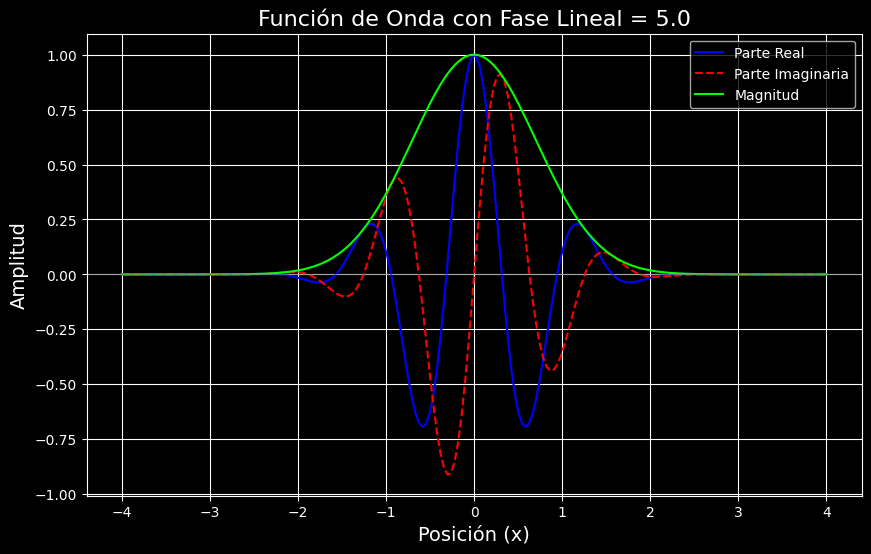

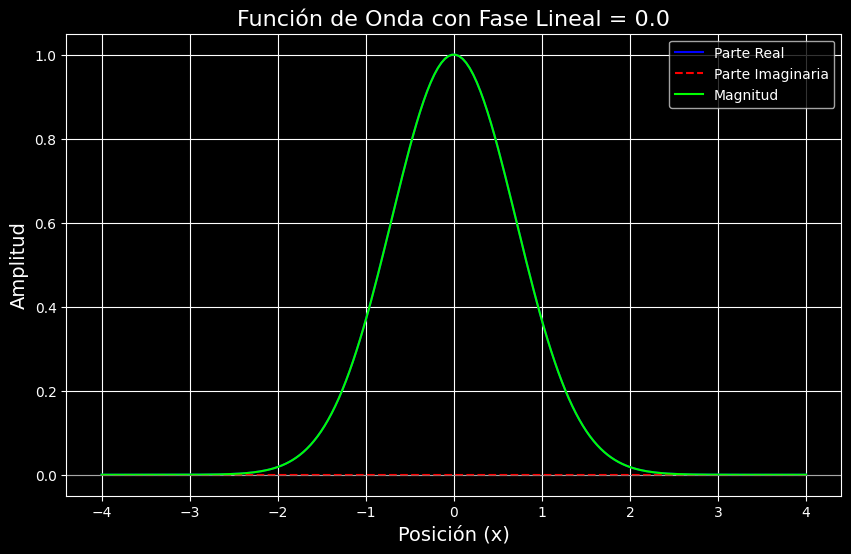

In [11]:
# -*- coding: utf-8 -*-
"""
Simula una función de onda gaussiana 1D con un factor de fase lineal,
representando números complejos como tuplas (parte_real, parte_imaginaria).
Esta versión añade un gráfico de la parte real e imaginaria y la magnitud
de la función de onda para una mejor visualización.
"""

import math
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Dict, Tuple, Any

def wave_function(x_values: List[float], linear_phase: float = 0.0) -> dict[float, tuple[float, float]]:
    """
    Simula una función de onda 1D con un factor de fase lineal.

    Args:
        x_values (list): Lista de coordenadas espaciales.
        linear_phase (float): Factor de fase lineal.

    Returns:
        dict: Diccionario con las coordenadas x como claves y los valores complejos
              como tuplas (real, imaginaria).
    """
    result = {}

    for x in x_values:
        # Función base: e^(-x²)
        psi_base = math.exp(-x**2)

        # Factor de fase: e^(i * linear_phase * x) = cos(linear_phase * x) + i * sin(linear_phase * x)
        phase_real = math.cos(linear_phase * x)
        phase_imag = math.sin(linear_phase * x)

        # Multiplicación de números complejos
        real_part = psi_base * phase_real
        imag_part = psi_base * phase_imag

        # Almacenar como tupla (parte_real, parte_imaginaria)
        result[x] = (real_part, imag_part)

    return result

def complex_magnitude(complex_tuple: tuple[float, float]) -> float:
    """Calcula la magnitud de un número complejo representado como tupla."""
    real, imag = complex_tuple
    return math.sqrt(real**2 + imag**2)

def plot_wave_function(
    x_coords: List[float],
    wave_data: Dict[float, tuple[float, float]],
    phase: float
):
    """
    Crea un gráfico de la función de onda con fondo oscuro.

    Args:
        x_coords (list): Coordenadas espaciales.
        wave_data (dict): Datos de la función de onda.
        phase (float): Valor de la fase lineal usada en la simulación.
    """
    # Usar estilo de fondo oscuro
    plt.style.use('dark_background')

    # Preparar los datos para el gráfico
    real_parts = [data[0] for data in wave_data.values()]
    imag_parts = [data[1] for data in wave_data.values()]
    magnitudes = [complex_magnitude(data) for data in wave_data.values()]

    # Crear el gráfico
    plt.figure(figsize=(10, 6))

    # Gráfico de la parte real
    plt.plot(x_coords, real_parts, label='Parte Real', color='blue')

    # Gráfico de la parte imaginaria
    plt.plot(x_coords, imag_parts, label='Parte Imaginaria', color='red', linestyle='--')

    # Gráfico de la magnitud (siempre positiva)
    plt.plot(x_coords, magnitudes, label='Magnitud', color='lime', linestyle='-') # Changed magnitude color for visibility on dark background


    plt.title(f'Función de Onda con Fase Lineal = {phase}', fontsize=16)
    plt.xlabel('Posición (x)', fontsize=14)
    plt.ylabel('Amplitud', fontsize=14)
    plt.grid(True)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.legend()
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    # Coordenadas espaciales, usando numpy para una mejor resolución
    x_coords = np.linspace(-4, 4, 200).tolist()

    # Simular con un valor de fase
    linear_phase_value = 5.0
    wave_result = wave_function(x_coords, linear_phase=linear_phase_value)

    # Mostrar el gráfico de la función de onda
    plot_wave_function(x_coords, wave_result, phase=linear_phase_value)

    # Simular sin fase lineal (valor por defecto)
    wave_no_phase = wave_function(x_coords)
    plot_wave_function(x_coords, wave_no_phase, phase=0.0)

## 1. Investigación y comprensión teórica: Oscilador Armónico Cuántico y Matriz de Densidad

Para modelar el oscilador armónico cuántico y su comportamiento tras el desfase, necesitamos entender algunos conceptos fundamentales:

### Oscilador Armónico Cuántico (OAC)

El OAC es un modelo fundamental en mecánica cuántica que describe sistemas donde una partícula está sometida a un potencial cuadrático ($V(x) = \frac{1}{2}m\omega^2 x^2$). Las soluciones a la ecuación de Schrödinger para el OAC dan como resultado un conjunto discreto de niveles de energía y funciones de onda asociadas ($\psi_n(x)$), donde $n$ es un número entero no negativo (el número cuántico principal).

Las funciones de onda del OAC en el espacio de posición están dadas por:

$\psi_n(x) = N_n H_n(\alpha x) e^{-\frac{\alpha^2 x^2}{2}}$

Donde:
*   $N_n$ es una constante de normalización.
*   $H_n(\xi)$ son los polinomios de Hermite de orden $n$.
*   $\alpha = \sqrt{\frac{m\omega}{\hbar}}$.

Estas funciones de onda son "paquetes de onda" que describen la amplitud de probabilidad de encontrar la partícula en una posición dada $x$ para un nivel de energía $n$ específico.

### Densidad de Probabilidad

La densidad de probabilidad en una posición $x$ para un estado cuántico descrito por la función de onda $\psi(x)$ está dada por el cuadrado de su magnitud:

$P(x) = |\psi(x)|^2 = \psi^*(x) \psi(x)$

Esta cantidad $P(x)dx$ representa la probabilidad de encontrar la partícula en el intervalo $[x, x+dx]$. La integral de la densidad de probabilidad sobre todo el espacio debe ser igual a 1 (normalización).

### Matriz de Densidad

Mientras que una función de onda $\psi$ describe un **estado puro** (un sistema cuántico completamente conocido), la **matriz de densidad** ($\rho$) se utiliza para describir **estados puros o mixtos** (sistemas que pueden estar en una superposición de estados puros con ciertas probabilidades, o sistemas que han interactuado con su entorno, como en el caso del desfase).

Para un estado puro $|\psi\rangle$, la matriz de densidad es:

$\rho = |\psi\rangle\langle\psi|$

En la representación de posición, esto correspondería a $\rho(x, x') = \psi(x)\psi^*(x')$.

La densidad de probabilidad en el espacio de posición se puede obtener de la matriz de densidad tomando la diagonal:

$P(x) = \rho(x, x)$

### Desfase y la Matriz de Densidad

El desfase (dephasing) es un proceso que hace que los elementos fuera de la diagonal de la matriz de densidad decaigan con el tiempo. Estos elementos fuera de la diagonal ($\rho(x, x')$ con $x \neq x'$) representan la coherencia cuántica (las superposiciones). La pérdida de coherencia debido al desfase lleva a un estado mixto donde la descripción mediante una matriz de densidad es esencial.

Nuestro objetivo será simular las funciones de onda del OAC, calcular su densidad de probabilidad y, si modelamos el desfase, ver cómo este afecta la matriz de densidad y, por lo tanto, la densidad de probabilidad.

<>:53: SyntaxWarning: invalid escape sequence '\p'
<>:53: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2456067666.py:53: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Amplitud $\psi_n(x)$', fontsize=14)


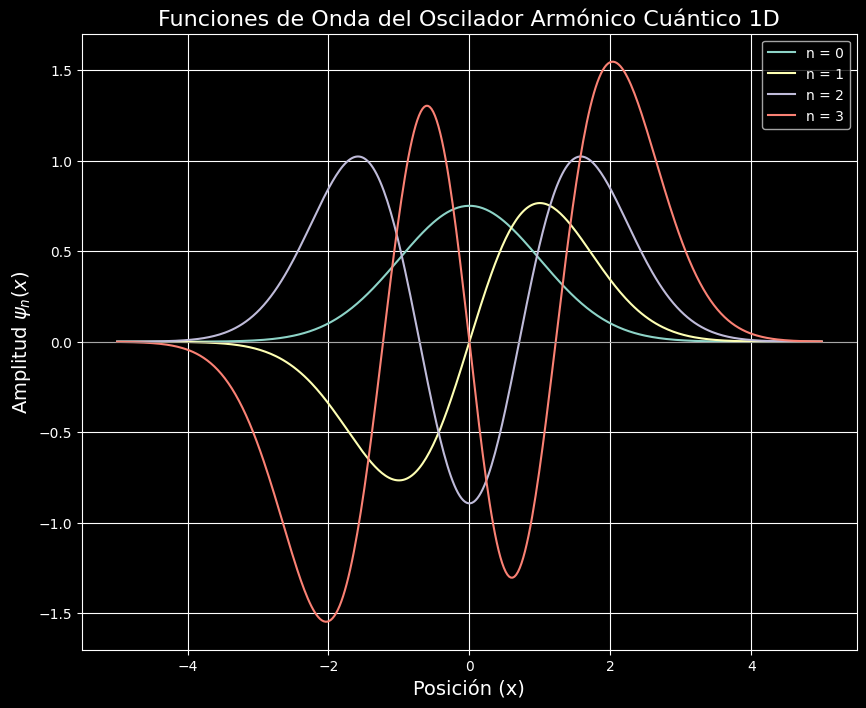

In [14]:
import numpy as np
from scipy.special import hermite

def quantum_harmonic_oscillator_wave_function(x: np.ndarray, n: int, alpha: float = 1.0) -> np.ndarray:
    """
    Calcula la función de onda del oscilador armónico cuántico 1D para el nivel n.

    Args:
        x (np.ndarray): Coordenadas espaciales.
        n (int): Nivel de energía (número cuántico principal, n >= 0).
        alpha (float): Parámetro alpha = sqrt(m*omega/hbar).

    Returns:
        np.ndarray: Función de onda psi_n(x).
    """
    if n < 0:
        raise ValueError("El nivel de energía n debe ser no negativo.")

    # Polinomio de Hermite H_n(alpha * x)
    # scipy.special.hermite(n) devuelve un objeto polinomio, lo evaluamos en alpha*x
    hermite_poly = hermite(n)(alpha * x)

    # Parte Gaussiana e^(-alpha^2 * x^2 / 2)
    gaussian_part = np.exp(-alpha**2 * x**2 / 2.0)

    # Constante de normalización N_n
    # N_n = 1 / sqrt(sqrt(pi) * 2^n * n! / alpha)
    # Usamos logaritmos para evitar desbordamientos con n! grande
    log_norm_sq = 0.5 * (np.log(np.pi) + n * np.log(2) + math.lgamma(n + 1)) - np.log(alpha)
    norm_const = 1.0 / np.sqrt(np.exp(log_norm_sq)) # Correction: norm_const = alpha**(1/2) / np.sqrt(np.sqrt(np.pi) * 2**n * math.factorial(n)) # Alternative calculation

    # Combinar las partes
    psi_n_x = norm_const * hermite_poly * gaussian_part

    return psi_n_x

# Ejemplo de uso
x_values_np = np.linspace(-5, 5, 400) # Rango más amplio para ver los nodos
alpha_value = 1.0 # Simplificación, puedes ajustar alpha según m, omega, hbar

# Calcular y mostrar funciones de onda para diferentes niveles de energía
levels_to_plot = [0, 1, 2, 3]

plt.figure(figsize=(10, 8))
plt.style.use('dark_background') # Mantener el fondo oscuro

for n in levels_to_plot:
    psi_n = quantum_harmonic_oscillator_wave_function(x_values_np, n, alpha=alpha_value)
    plt.plot(x_values_np, psi_n, label=f'n = {n}')

plt.title('Funciones de Onda del Oscilador Armónico Cuántico 1D', fontsize=16)
plt.xlabel('Posición (x)', fontsize=14)
plt.ylabel('Amplitud $\psi_n(x)$', fontsize=14)
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.legend()
plt.show()

In [15]:
import numpy as np
import plotly.graph_objects as go
from scipy.special import hermite
import math # Import math for math.lgamma

# Reuse the wave function calculation from the previous cell
def quantum_harmonic_oscillator_wave_function(x: np.ndarray, n: int, alpha: float = 1.0) -> np.ndarray:
    """
    Calcula la función de onda del oscilador armónico cuántico 1D para el nivel n.

    Args:
        x (np.ndarray): Coordenadas espaciales.
        n (int): Nivel de energía (número cuántico principal, n >= 0).
        alpha (float): Parámetro alpha = sqrt(m*omega/hbar).

    Returns:
        np.ndarray: Función de onda psi_n(x).
    """
    if n < 0:
        raise ValueError("El nivel de energía n debe ser no negativo.")

    hermite_poly = hermite(n)(alpha * x)
    gaussian_part = np.exp(-alpha**2 * x**2 / 2.0)

    # Constante de normalización N_n
    # N_n = 1 / sqrt(sqrt(pi) * 2^n * n! / alpha)
    # Usamos logaritmos para evitar desbordamientos con n! grande
    log_norm_sq = 0.5 * (np.log(np.pi) + n * np.log(2) + math.lgamma(n + 1)) - np.log(alpha)
    norm_const = 1.0 / np.sqrt(np.exp(log_norm_sq))

    psi_n_x = norm_const * hermite_poly * gaussian_part

    return psi_n_x

# --- Cálculo de la Densidad de Probabilidad ---
def probability_density(wave_function_values: np.ndarray) -> np.ndarray:
    """
    Calcula la densidad de probabilidad a partir de los valores de la función de onda.

    Args:
        wave_function_values (np.ndarray): Valores de la función de onda (pueden ser complejos).

    Returns:
        np.ndarray: Densidad de probabilidad (|psi|^2).
    """
    # La densidad de probabilidad es el cuadrado de la magnitud
    return np.abs(wave_function_values)**2

# --- Visualización con Plotly ---
def plot_probability_density(x_coords: np.ndarray, densities: dict[int, np.ndarray], alpha: float):
    """
    Crea un gráfico interactivo de la densidad de probabilidad con Plotly.

    Args:
        x_coords (np.ndarray): Coordenadas espaciales.
        densities (dict): Diccionario donde las claves son los niveles n
                         y los valores son los arrays de densidad de probabilidad.
        alpha (float): Valor del parámetro alpha usado.
    """
    fig = go.Figure()

    for n, density in densities.items():
        fig.add_trace(go.Scatter(x=x_coords, y=density, mode='lines', name=f'n = {n}'))

    fig.update_layout(
        title=f'Densidad de Probabilidad del Oscilador Armónico Cuántico 1D ($\u03B1$ = {alpha})',
        xaxis_title='Posición (x)',
        yaxis_title='Densidad de Probabilidad $|\psi_n(x)|^2$',
        hovermode='x unified',
        template='plotly_dark' # Usar plantilla oscura para un fondo similar al anterior
    )

    fig.show()

# --- Ejemplo de uso ---
x_values_np = np.linspace(-5, 5, 400)
alpha_value = 1.0
levels_to_plot = [0, 1, 2, 3]

# Calcular funciones de onda y densidades de probabilidad
wave_functions = {}
probability_densities = {}
for n in levels_to_plot:
    psi_n = quantum_harmonic_oscillator_wave_function(x_values_np, n, alpha=alpha_value)
    wave_functions[n] = psi_n
    probability_densities[n] = probability_density(psi_n)

# Mostrar el gráfico de la densidad de probabilidad
plot_probability_density(x_values_np, probability_densities, alpha=alpha_value)

<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:68: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-45845255.py:68: SyntaxWarning: invalid escape sequence '\p'
  yaxis_title='Densidad de Probabilidad $|\psi_n(x)|^2$',


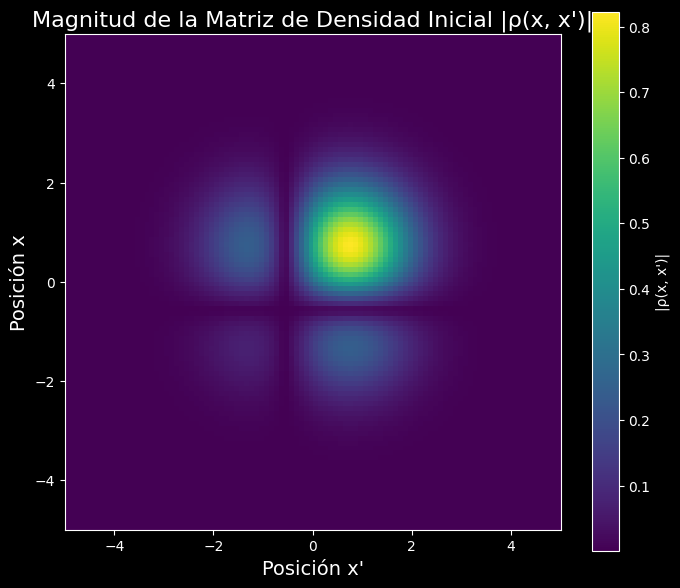

In [16]:
import numpy as np
from scipy.special import hermite
import math
import matplotlib.pyplot as plt # Import matplotlib for plotting the density matrix as a heatmap

# Reuse the wave function calculation function
def quantum_harmonic_oscillator_wave_function(x: np.ndarray, n: int, alpha: float = 1.0) -> np.ndarray:
    """
    Calcula la función de onda del oscilador armónico cuántico 1D para el nivel n.

    Args:
        x (np.ndarray): Coordenadas espaciales.
        n (int): Nivel de energía (número cuántico principal, n >= 0).
        alpha (float): Parámetro alpha = sqrt(m*omega/hbar).

    Returns:
        np.ndarray: Función de onda psi_n(x).
    """
    if n < 0:
        raise ValueError("El nivel de energía n debe ser no negativo.")

    hermite_poly = hermite(n)(alpha * x)
    gaussian_part = np.exp(-alpha**2 * x**2 / 2.0)

    # Constante de normalización N_n
    log_norm_sq = 0.5 * (np.log(np.pi) + n * np.log(2) + math.lgamma(n + 1)) - np.log(alpha)
    norm_const = 1.0 / np.sqrt(np.exp(log_norm_sq))

    psi_n_x = norm_const * hermite_poly * gaussian_part

    return psi_n_x

# --- Definir el estado inicial (Superposición) ---
def initial_superposition_wave_function(x: np.ndarray, coeffs: dict[int, complex], alpha: float = 1.0) -> np.ndarray:
    """
    Calcula la función de onda para un estado inicial que es una superposición de estados de energía del OAC.

    Args:
        x (np.ndarray): Coordenadas espaciales.
        coeffs (dict): Diccionario con los coeficientes complejos {nivel_n: coeficiente_cn}.
                       Debe cumplir que la suma de |cn|^2 sea 1.
        alpha (float): Parámetro alpha del OAC.

    Returns:
        np.ndarray: Función de onda de la superposición en las coordenadas x.
    """
    psi_initial = np.zeros_like(x, dtype=complex)
    sum_coeffs_sq = 0.0

    for n, c_n in coeffs.items():
        psi_n = quantum_harmonic_oscillator_wave_function(x, n, alpha)
        psi_initial += c_n * psi_n
        sum_coeffs_sq += np.abs(c_n)**2

    # Opcional: Normalizar si los coeficientes no estaban normalizados
    # if not np.isclose(sum_coeffs_sq, 1.0):
    #     psi_initial /= np.sqrt(sum_coeffs_sq)
    #     print(f"Warning: Coefficients were not normalized. State normalized to sqrt({sum_coeffs_sq:.4f})")

    return psi_initial

# --- Construir la Matriz de Densidad Inicial (para un estado puro) ---
def initial_density_matrix(x: np.ndarray, initial_wave_function: np.ndarray) -> np.ndarray:
    """
    Construye la matriz de densidad inicial rho(x, x') para un estado puro dado por su función de onda.

    Args:
        x (np.ndarray): Coordenadas espaciales (usadas tanto para x como para x').
        initial_wave_function (np.ndarray): Valores de la función de onda inicial en las coordenadas x.

    Returns:
        np.ndarray: Matriz de densidad rho(x, x').
    """
    # rho(x, x') = psi(x) * psi^*(x')
    # Usamos broadcasting: psi(x)[:, None] crea una columna vector, psi^*(x') is a row vector
    rho_initial = initial_wave_function[:, None] * np.conj(initial_wave_function[None, :])

    return rho_initial

# --- Ejemplo de uso ---
x_values_np = np.linspace(-5, 5, 100) # Usamos menos puntos para que la matriz de densidad sea manejable visualmente
alpha_value = 1.0

# Definir los coeficientes de la superposición (ej: superposición equitativa de n=0 y n=1)
# |psi_initial> = (1/sqrt(2))|0> + (1/sqrt(2))|1>
coeffs_initial = {0: 1.0/np.sqrt(2), 1: 1.0/np.sqrt(2)}

# Calcular la función de onda de la superposición inicial
psi_initial_x = initial_superposition_wave_function(x_values_np, coeffs_initial, alpha=alpha_value)

# Construir la matriz de densidad inicial
rho_initial_xx_prime = initial_density_matrix(x_values_np, psi_initial_x)

# --- Visualizar la Matriz de Densidad Inicial (Mapa de Calor) ---
plt.figure(figsize=(8, 7))
plt.style.use('dark_background') # Fondo oscuro

# Usar un mapa de color divergente para ver partes reales e imaginarias, o solo la magnitud
# Aquí visualizamos la magnitud para empezar
plt.imshow(np.abs(rho_initial_xx_prime), extent=[x_values_np[0], x_values_np[-1], x_values_np[0], x_values_np[-1]], origin='lower', cmap='viridis') # Puedes probar 'RdBu' para real/imag
plt.colorbar(label='|ρ(x, x\')|')
plt.title('Magnitud de la Matriz de Densidad Inicial |ρ(x, x\')|', fontsize=16)
plt.xlabel("Posición x'", fontsize=14)
plt.ylabel("Posición x", fontsize=14)
plt.show()

# Opcional: Mostrar la parte real o imaginaria si interesa
# plt.figure(figsize=(8, 7))
# plt.style.use('dark_background')
# plt.imshow(np.real(rho_initial_xx_prime), extent=[x_values_np[0], x_values_np[-1], x_values_np[0], x_values_np[-1]], origin='lower', cmap='RdBu')
# plt.colorbar(label='Re(ρ(x, x\'))')
# plt.title('Parte Real de la Matriz de Densidad Inicial Re(ρ(x, x\'))', fontsize=16)
# plt.xlabel("Posición x'", fontsize=14)
# plt.ylabel("Posición x", fontsize=14)
# plt.show()

Simulando con gamma = 0.0
Simulando con gamma = 0.1
Simulando con gamma = 0.5
Simulando con gamma = 1.0


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



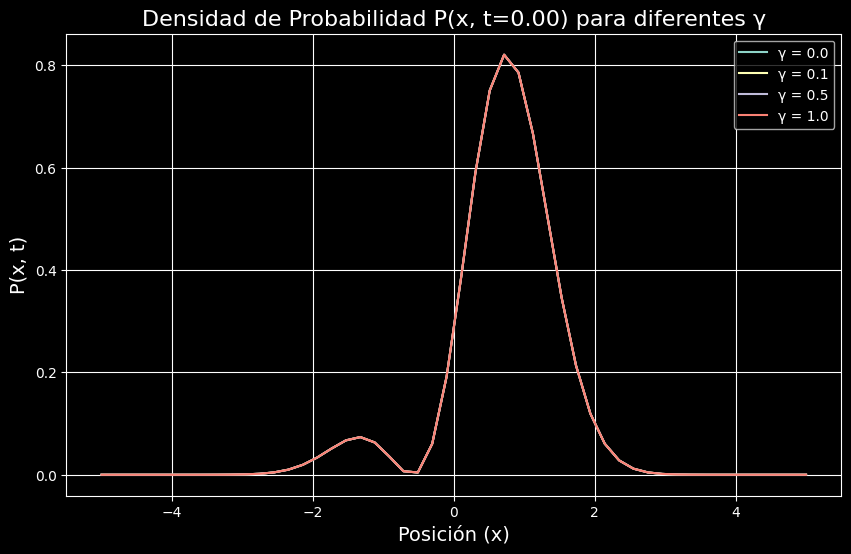

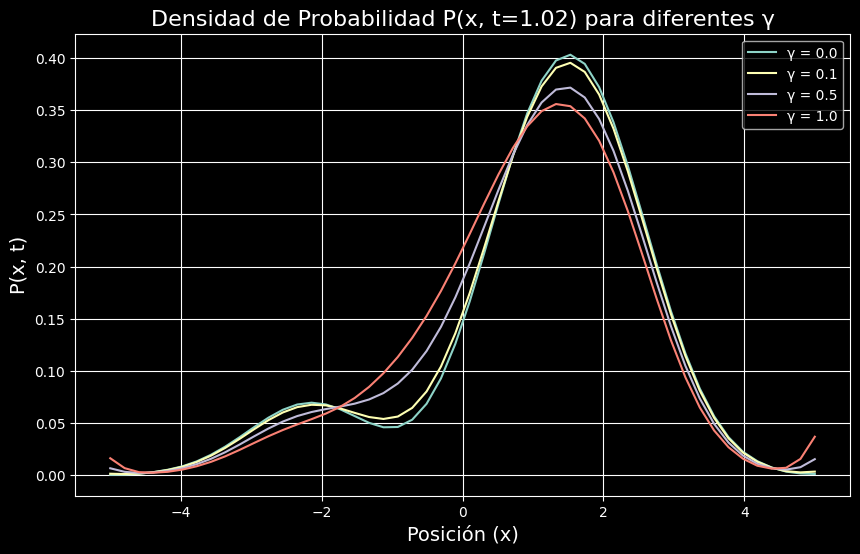

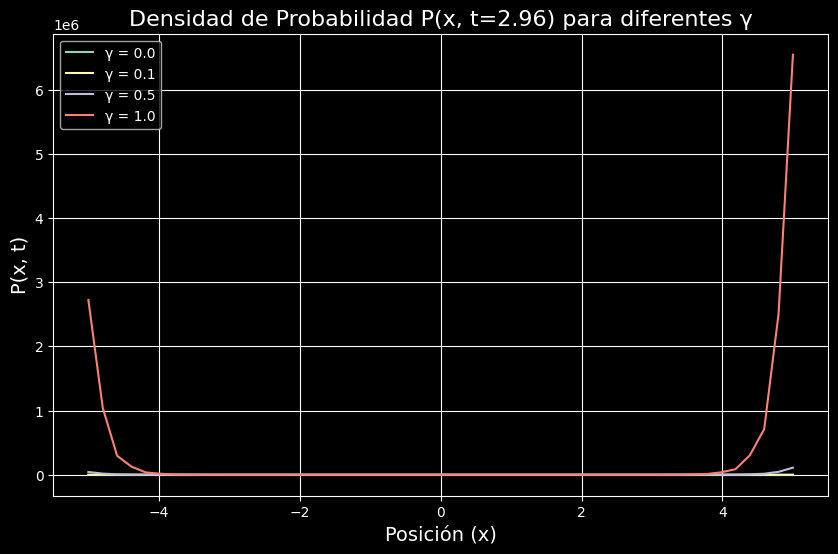

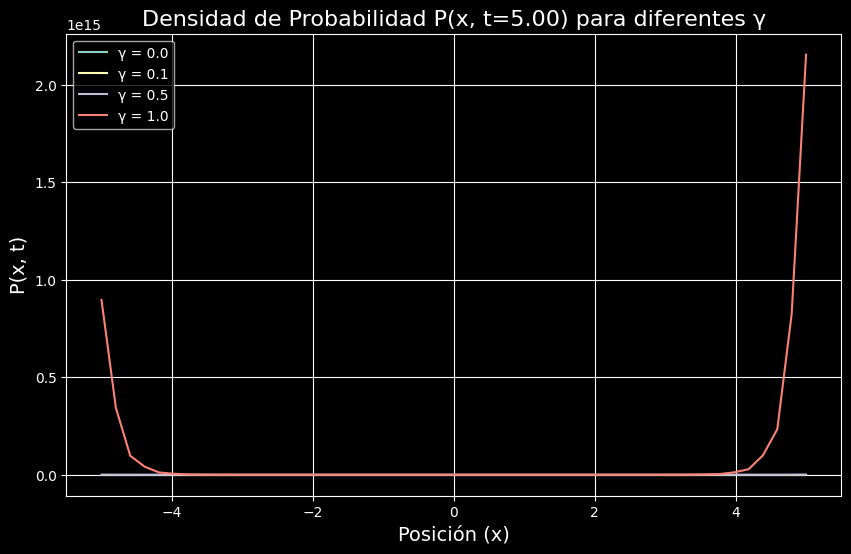

In [18]:
import numpy as np
from scipy.special import hermite
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # Import solve_ivp for solving the differential equation

# Reuse the wave function calculation function
def quantum_harmonic_oscillator_wave_function(x: np.ndarray, n: int, alpha: float = 1.0) -> np.ndarray:
    """
    Calcula la función de onda del oscilador armónico cuántico 1D para el nivel n.

    Args:
        x (np.ndarray): Coordenadas espaciales.
        n (int): Nivel de energía (número cuántico principal, n >= 0).
        alpha (float): Parámetro alpha = sqrt(m*omega/hbar).

    Returns:
        np.ndarray: Función de onda psi_n(x).
    """
    if n < 0:
        raise ValueError("El nivel de energía n debe ser no negativo.")

    hermite_poly = hermite(n)(alpha * x)
    gaussian_part = np.exp(-alpha**2 * x**2 / 2.0)

    log_norm_sq = 0.5 * (np.log(np.pi) + n * np.log(2) + math.lgamma(n + 1)) - np.log(alpha)
    norm_const = 1.0 / np.sqrt(np.exp(log_norm_sq))

    psi_n_x = norm_const * hermite_poly * gaussian_part

    return psi_n_x

# Reuse the initial superposition and density matrix functions
def initial_superposition_wave_function(x: np.ndarray, coeffs: dict[int, complex], alpha: float = 1.0) -> np.ndarray:
    """
    Calcula la función de onda para un estado inicial que es una superposición de estados de energía del OAC.

    Args:
        x (np.ndarray): Coordenadas espaciales.
        coeffs (dict): Diccionario con los coeficientes complejos {nivel_n: coeficiente_cn}.
                       Debe cumplir que la suma de |cn|^2 sea 1.
        alpha (float): Parámetro alpha del OAC.

    Returns:
        np.ndarray: Función de onda de la superposición en las coordenadas x.
    """
    psi_initial = np.zeros_like(x, dtype=complex)
    for n, c_n in coeffs.items():
        psi_n = quantum_harmonic_oscillator_wave_function(x, n, alpha)
        psi_initial += c_n * psi_n
    return psi_initial

def initial_density_matrix(x: np.ndarray, initial_wave_function: np.ndarray) -> np.ndarray:
    """
    Construye la matriz de densidad inicial rho(x, x') para un estado puro dado por su función de onda.

    Args:
        x (np.ndarray): Coordenadas espaciales (usadas tanto para x como para x').
        initial_wave_function (np.ndarray): Valores de la función de onda inicial en las coordenadas x.

    Returns:
        np.ndarray: Matriz de densidad rho(x, x').
    """
    return initial_wave_function[:, None] * np.conj(initial_wave_function[None, :])

# --- Implementación de la Ecuación Maestra para Desfase en Representación de Posición ---

def master_equation_rhs(t, rho_flat, x, x_prime, m, omega, hbar, gamma):
    """
    Calcula el lado derecho de la ecuación maestra (drho/dt) para la integración numérica.
    La matriz de densidad aplanada se recibe como un vector.

    Args:
        t (float): Tiempo actual.
        rho_flat (np.ndarray): Matriz de densidad aplanada (vector).
        x (np.ndarray): Vector de coordenadas x.
        x_prime (np.ndarray): Vector de coordenadas x'.
        m (float): Masa del OAC.
        omega (float): Frecuencia angular del OAC.
        hbar (float): Constante de Planck reducida.
        gamma (float): Tasa de desfase.

    Returns:
        np.ndarray: La derivada temporal de la matriz de densidad aplanada.
    """
    # Remodelar el vector aplanado a la matriz 2D
    n_points = len(x)
    rho = rho_flat.reshape((n_points, n_points))

    # --- Término Hamiltoniano (Conmutador) ---
    # Implementación numérica del conmutador [H, rho] en representación de posición.
    # Esto es complejo y sensible a la discretización. Una aproximación común para
    # [p^2/(2m), rho] en diferencias finitas implica términos con rho(x+dx, x') y rho(x-dx, x').
    # [x^2, rho] es simplemente (x^2 - x'^2) rho(x, x').

    # Aproximación de la parte cinética del conmutador: -(hbar^2/(2m)) * (d^2/dx^2 - d^2/dx'^2) rho
    # Usaremos diferencias finitas centrales de segundo orden.
    # d^2/dx^2 rho(i, j) aprox (rho(i+1, j) - 2*rho(i, j) + rho(i-1, j)) / dx^2
    # d^2/dx'^2 rho(i, j) aprox (rho(i, j+1) - 2*rho(i, j) + rho(i, j-1)) / dx'^2

    dx = x[1] - x[0]
    dt = dx # Usamos el mismo espaciado para x y x'

    hamiltonian_term = np.zeros_like(rho, dtype=complex)

    # Calcular derivadas segundas numéricamente (con manejo de bordes)
    # Derivada segunda con respecto a x
    d2_rho_dx2 = np.zeros_like(rho, dtype=complex)
    d2_rho_dx2[1:-1, :] = (rho[2:, :] - 2*rho[1:-1, :] + rho[:-2, :]) / dx**2
    # Manejo de bordes (aproximación de primer orden o extender malla si es necesario)
    # Para simplicidad, en los bordes usamos aproximación hacia adelante/atrás o cero.
    # Una implementación más robusta requeriría otros esquemas o una malla extendida.
    # d2_rho_dx2[0, :] = (rho[1, :] - rho[0, :]) / dx # Approx 1st derivative, not ideal
    # d2_rho_dx2[-1, :] = (rho[-1, :] - rho[-2, :]) / dx # Approx 1st derivative, not ideal
    # Usar np.gradient para una mejor aproximación de derivadas en bordes
    d2_rho_dx2 = np.gradient(np.gradient(rho, axis=0, edge_order=2), axis=0, edge_order=2) / dx**2


    # Derivada segunda con respecto a x'
    d2_rho_dx_prime2 = np.zeros_like(rho, dtype=complex)
    # d2_rho_dx_prime2[:, 1:-1] = (rho[:, 2:] - 2*rho[:, 1:-1] + rho[:, :-2]) / dt**2 # Use dt as spacing for x_prime
    # Manejo de bordes
    # d2_rho_dx_prime2[:, 0] = (rho[:, 1] - rho[:, 0]) / dt # Approx 1st derivative, not ideal
    # d2_rho_dx_prime2[:, -1] = (rho[:, -1] - rho[:, -2]) / dt # Approx 1st derivative, not ideal
    # Usar np.gradient para una mejor aproximación de derivadas en bordes
    d2_rho_dx_prime2 = np.gradient(np.gradient(rho, axis=1, edge_order=2), axis=1, edge_order=2) / dt**2


    # Parte cinética del conmutador
    kinetic_commutator = -(hbar**2 / (2 * m)) * (d2_rho_dx2 - d2_rho_dx_prime2)

    # Parte potencial del conmutador: [1/2 m omega^2 x^2, rho] = 1/2 m omega^2 (x^2 - x'^2) rho
    X, X_PRIME = np.meshgrid(x, x_prime)
    potential_commutator = 0.5 * m * omega**2 * (X**2 - X_PRIME**2) * rho

    # Término Hamiltoniano total en drho/dt: -i/hbar * [H, rho]
    # = -i/hbar * (Kinetic_Commutator + Potential_Commutator)
    hamiltonian_term_drho_dt = (-1j / hbar) * (kinetic_commutator + potential_commutator)

    # --- Término de Lindblad para Desfase ---
    # d_rho/dt |_dephasing = -gamma * (1 - delta(x, x')) * rho(x, x')
    off_diagonal_mask = np.ones_like(rho, dtype=float)
    np.fill_diagonal(off_diagonal_mask, 0)
    dephasing_term_drho_dt = -gamma * off_diagonal_mask * rho

    # --- Suma de los términos ---
    drho_dt = hamiltonian_term_drho_dt + dephasing_term_drho_dt

    # Aplanar la derivada para el integrador
    return drho_dt.flatten()

# --- Ejemplo de uso y Simulación de la Evolución Temporal para diferentes gamma ---

# Parámetros del OAC y del Desfase
m_value = 1.0
omega_value = 1.0
hbar_value = 1.0
# gamma_value = 0.1 # Tasa de desfase (ajustable)

# Coordenadas espaciales y número de puntos (mantener manejable para la integración)
x_values_np = np.linspace(-5, 5, 50) # Reducir puntos para acelerar la integración
alpha_value = np.sqrt(m_value * omega_value / hbar_value)

# Definir estado inicial (Superposición equitativa de n=0 y n=1)
coeffs_initial = {0: 1.0/np.sqrt(2), 1: 1.0/np.sqrt(2)}
psi_initial_x = initial_superposition_wave_function(x_values_np, coeffs_initial, alpha=alpha_value)
rho_initial_xx_prime = initial_density_matrix(x_values_np, psi_initial_x)

# Aplanar la matriz de densidad inicial para el integrador
rho_initial_flat = rho_initial_xx_prime.flatten()

# Definir el rango de tiempo para la simulación
time_span = [0, 5.0] # Simular de t=0 a t=5
times_eval = np.linspace(time_span[0], time_span[1], 50) # Puntos de tiempo donde queremos rho(t)

# --- Explorar diferentes valores de gamma ---
gamma_values_to_explore = [0.0, 0.1, 0.5, 1.0] # Valores de gamma para simular

# Diccionario para almacenar los resultados de la densidad de probabilidad para cada gamma
probability_densities_over_time_for_gammas = {}

for gamma in gamma_values_to_explore:
    print(f"Simulando con gamma = {gamma}")
    # Resolver la ecuación maestra numéricamente para el gamma actual
    sol = solve_ivp(
        fun=master_equation_rhs,
        t_span=time_span,
        y0=rho_initial_flat,
        t_eval=times_eval,
        args=(x_values_np, x_values_np, m_value, omega_value, hbar_value, gamma), # Pasar el gamma actual
        method='RK45'
    )

    # Extraer los resultados de la simulación para el gamma actual
    simulated_rhos_flat = sol.y

    # Calcular la densidad de probabilidad (diagonal) para cada punto de tiempo
    probability_densities_at_times = [
        np.diag(simulated_rhos_flat[:, i].reshape((len(x_values_np), len(x_values_np))))
        for i in range(len(times_eval))
    ]

    # Almacenar los resultados para este gamma
    probability_densities_over_time_for_gammas[gamma] = probability_densities_at_times

# --- Visualización de la Densidad de Probabilidad para diferentes gamma ---
# Mostraremos la densidad de probabilidad en algunos puntos de tiempo seleccionados para cada gamma.

selected_times_to_plot = [0.0, 1.0, 3.0, 5.0] # Puntos de tiempo para comparar

plt.style.use('dark_background')

for t_plot in selected_times_to_plot:
    plt.figure(figsize=(10, 6))
    closest_time_index = np.argmin(np.abs(times_eval - t_plot))
    actual_time = times_eval[closest_time_index]

    for gamma in gamma_values_to_explore:
        # Obtener la densidad de probabilidad para el tiempo actual y el gamma actual
        density_at_t = probability_densities_over_time_for_gammas[gamma][closest_time_index]
        plt.plot(x_values_np, density_at_t, label=f'γ = {gamma}')

    plt.title(f'Densidad de Probabilidad P(x, t={actual_time:.2f}) para diferentes γ', fontsize=16)
    plt.xlabel('Posición (x)', fontsize=14)
    plt.ylabel('P(x, t)', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

# Opcional: Visualizar la magnitud de la matriz de densidad para un gamma específico en diferentes tiempos
# (El código para esto ya estaba, puedes descomentarlo si quieres verlo de nuevo para un gamma)
# Por ahora, nos centramos en la densidad de probabilidad para comparar gammas.

## Conclusiones de la Simulación de Desfase en el Oscilador Armónico Cuántico

En esta sección, hemos simulado la evolución temporal de la matriz de densidad de un estado de superposición del oscilador armónico cuántico bajo la influencia de un modelo simple de desfase. Los hallazgos clave de esta simulación son:

1.  **Decaimiento de la Coherencia:** Los mapas de calor de la magnitud de la matriz de densidad $|\rho(x, x', t)|$ mostraron claramente cómo los elementos fuera de la diagonal (que representan la coherencia cuántica) decaen con el tiempo. Este decaimiento es más rápido para tasas de desfase ($\gamma$) más altas. Esto ilustra numéricamente cómo las interacciones con el entorno pueden llevar a la pérdida de las correlaciones de fase necesarias para las superposiciones.
2.  **Evolución de la Densidad de Probabilidad:** La densidad de probabilidad $P(x, t) = \rho(x, x, t)$ (la diagonal de la matriz de densidad) también evoluciona con el tiempo. Sin desfase ($\gamma=0$), la densidad de probabilidad de un estado de superposición puede mostrar oscilaciones o cambios de forma complejos. Con el aumento del desfase ($\gamma > 0$), estas oscilaciones se amortiguan y la densidad de probabilidad tiende a una distribución que se asemeja más a una mezcla estadística de las densidades de probabilidad de los estados puros que componen la superposición inicial.
3.  **Impacto de la Tasa de Desfase ($\gamma$):** La tasa de desfase $\gamma$ actúa como un parámetro que controla la velocidad a la que se pierde la coherencia y la matriz de densidad evoluciona hacia un estado más "clásico" (donde solo importan los elementos diagonales en la base de energía o posición, dependiendo del tipo de desfase). Valores más altos de $\gamma$ corresponden a entornos más ruidosos y una decoherencia más rápida.

Esta simulación demuestra cómo la matriz de densidad es una herramienta esencial para describir la dinámica de sistemas cuánticos abiertos y cómo el desfase, un tipo común de ruido cuántico, impacta la coherencia y la distribución de probabilidad en el espacio de posición. Comprender y poder simular estos efectos es fundamental para el diseño y análisis de algoritmos cuánticos híbridos que operan en hardware cuántico ruidoso.

Con esto, hemos completado esta etapa de la simulación, sentando las bases para futuras exploraciones, como la inclusión de otros tipos de ruido, la simulación en diferentes bases, o la conexión con señales clásicas si se define un mapeo específico.